# Unsupervised machine learning

There is no known output. The algorithm is just shown the data and asked to extract knowledge from it

* Transformations: Create new representations of the data that is easier for humans or other ML algorithms to understand.

* Clustering: Partition data into distinct groups of similar items.

As unsupervised algorithms can be quite unpredictable, they are often used in exploratory settings, when the scientist wants to know the data better, rather than as part of a larger automatic system.

Index:
* Preprocessing and scaling
    * Different kinds of preprocessing
    * Applying data transformations
    * Scaling training and test data the same way
    * The Effect of Preprocessing on Supervised Learning
* Dimensionality reduction, Feature extraction, and Manifold Learning
    * Principal Component Analysis (PCA)
    * Non-negative matrix factorization (NMF)
    * t-SNE
* Clustering
    * k-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

C:\Users\luisc\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Preprocessing and scaling

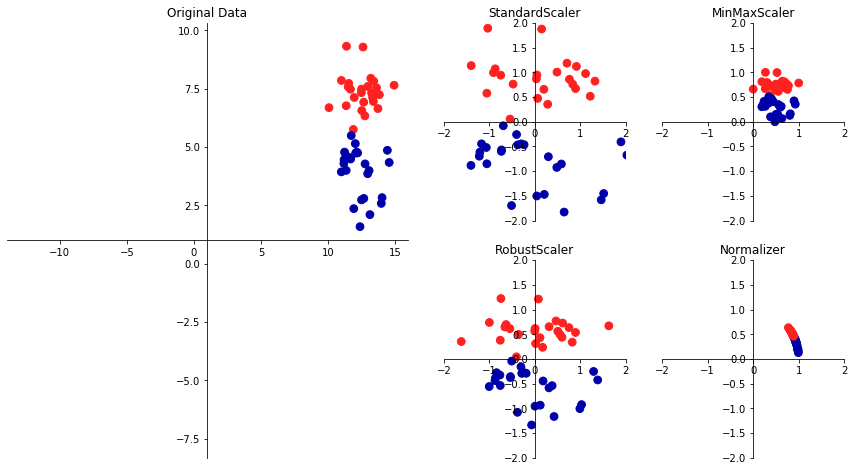

In [2]:
mglearn.plots.plot_scaling()

## Different kinds of preprocessing

The ones shown in the previous graphs:

* StandardScaler: ensures that for each feature the the mean is 0 and variance is 1, bringing all features to the same magnitude. However, it doesn't ensure any particular minimum or maximum for the features.
* RobustScaler: Similar to the StandardScaler, but it uses median and quartiles instead. This scaler ignores outliers.
* MinMaxScaler: Shifts the data so that everything is between 0 and 1
* Normalizer: It projects each datapoint on a circle with a radius of one. If there are more dimensions then on a sphere or hyper-sphere and crazy stuff. This means that every data point is scaled by a different number.

## Applying data transformations

Let's apply scaling on the breast cancer dataset

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state = 1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


Now we import the class that does the preprocessing and instantiate it:

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

To apply the transformation whe use the transform method of the scaler.

In [5]:
# Transform the data
X_train_scaled = scaler.transform(X_train)

#Print dataset properties before and after scaling
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


The transformed data has the same shape as the original one, it is just scaled.

We also need to transform the test set.

In [6]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In the case of the test set the numbers are outside of the range of 0 to 1. This is because the scalers always apply the exact same transformation from the training set to the test set.

It always substracts the training set minimum and divides by the training set range, which might be different from the minimum and range from the test set.

## Scaling Training and Test Data the same way

It is important to apply exactly the same transformation to the training and test sets for the algorithms to work correctly.

If we scale them differently trouble arises, like in the following example.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

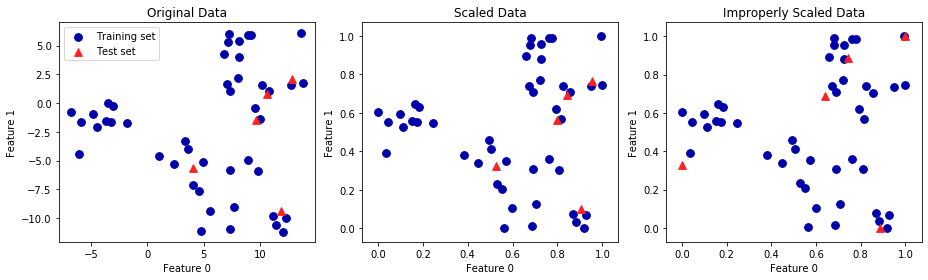

In [7]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

#-------------------------------------------------------------------------------
# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
#-------------------------------------------------------------------------------
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

It can be seen that the improperly scaled data doesn't have the same shape as the original data.

### NOTE:

Instead of doing .fit on the scaler and then using .transform to scale my training set, I can use .fit_transform to do it more efficiently.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Calling fit and transform in sequence (method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# Same result, but more efficient computation
X_scaled = scaler.fit_transform(X_train)

## The Effect of Preprocessing on Supervised 

We'll first fit a model to the original cancer dataset, and then repeat the operation but on a scaled dataset

In [9]:
# Data without scaling
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

cancer= load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


C:\Users\luisc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
# The trained model after scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# Scoring on the scaled test set
print("Scaled tst set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled tst set accuracy: 0.97


C:\Users\luisc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Scaling the data can improve performance quite drastically.

Changing the scaler is pretty easy as all of them use the same interface.

In [11]:
# Preprocessing using zero man and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Learning on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


# Dimensionality reduction, feature extraction, and manifold learning

The most common motivations for transforming data with unsupervised learning are visualization, compressing the data, and finding a representation that is more informative for further processing.

Three common algorithms:
* Principal Component Analysis (PCA)
* Non-negative matrix factorization (NMF): feature extraction
* t-SNE: commonly used for visualization in scatter plots

## Principal Component Analysis (PCA)

Rotates the dataset in a way that the rotated features are statistically uncorrelated.

This rotation is followed by selecting some of the new features, according to how important they are for explaining the data.

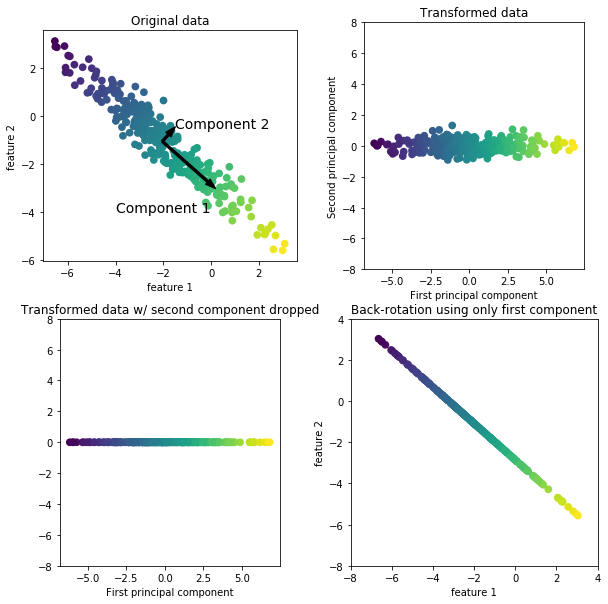

In [12]:
mglearn.plots.plot_pca_illustration()

##### First plot:
The first plot shows the original data points.

The algorithm first detects the direction in which the features are more correlated with each other (Component 1).
Then, the algorithm finds the direction that contains the most information while being orthogonal (at a right angle)to the first direction (Component 2).

These two directions are called PRINCIPAL COMPONENTS, ast hey are the main directions of variance in the data.

In general, there are as many principal components as original features.

##### Second plot:
Data is rotated so that the first principal component aligns with the x-axis and the second principal component to the y axis.

Before the rotation the mean was substracted to so the transformed data is centered around zero.

In the rotated form the two axes are uncorrelated.

##### Third and fourth plots
We then use PCA for dimensionality reduction by retaining only some of the principal components. In this case we are reducing the data into only 1 dimension, keeping only the first principal component.

In the last plot, we rotate the data again, returning it ot its original space and adding the mean to it.

Now we only have the information contained in the first principal component. This is often used to remove noise effects or visualize what part of the info is retained using the principal components.

### Applying PCA to the cancer dataset for visualization

One of the most common applications of PCA is to visualize high dimensional data.

One way to visualize it is to plot a histogram of each feature and for each of the classes and see how the feature magnitudes behave in each class.

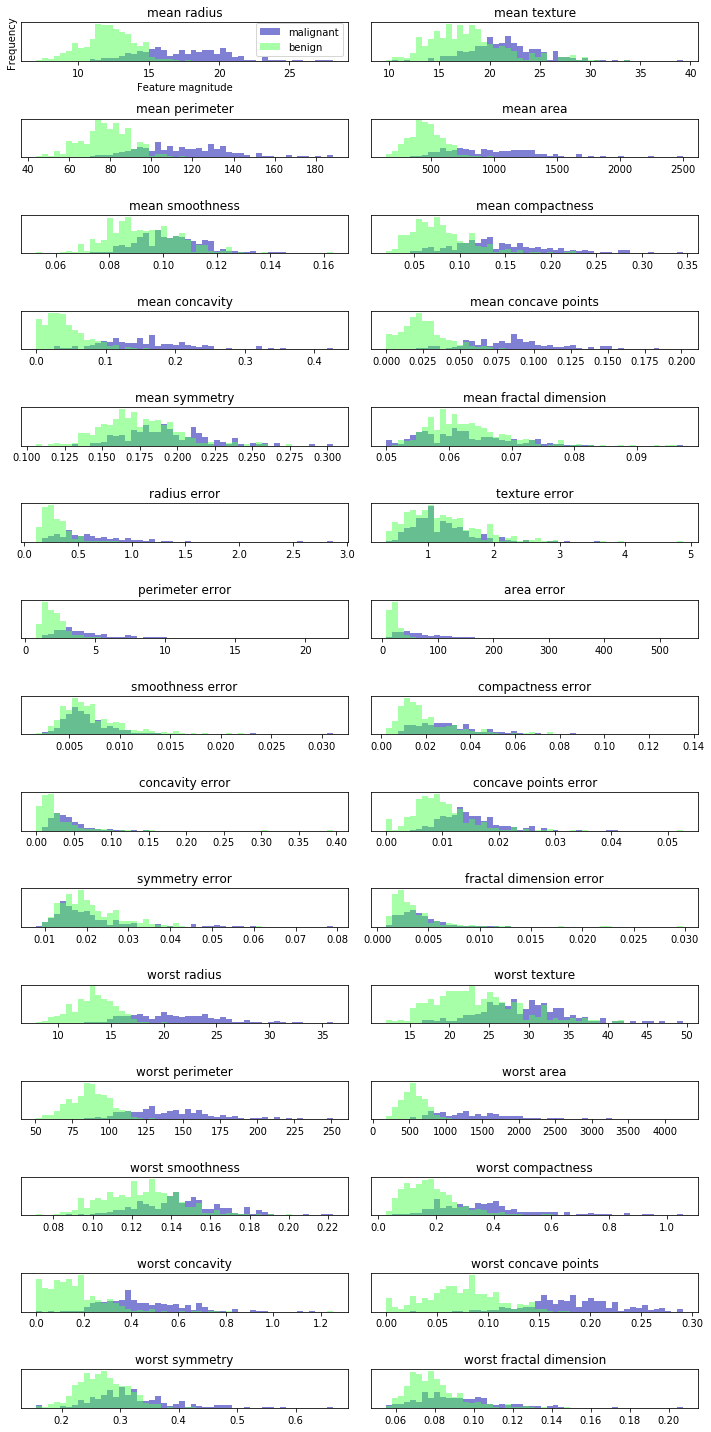

In [13]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

While the plots may tell us some information, it doesn't give us anything on the interaction between variables.

Using PCA, we can capture the main interactions and get a slightly better picture.

We can find the first two principal components and visualize the data in a 2D dataplot.

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

scaler = StandardScaler()

scaler.fit(cancer['data'])

X_scaled = scaler.transform(cancer['data'])

PCA works like the scalers, in thatfirst you instantiate the class, you fit it and then use transform.

You need to specify to the algorithm how many components we want to keep.

In [15]:
from sklearn.decomposition import PCA
#Keep first two principal components of the data
pca = PCA(n_components = 2)
# Fit PCA model to breast cancer data
pca.fit(X_scaled)

# Transform data onto the first two principal components
X_pca = pca.transform(X_scaled)

print("Original shape: {}".format(X_scaled.shape))
print("Reduced shape: {}".format(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


The dataset wass reduced from 30 dimensions to just two dimensions.

Now we can plot it.

It is important to note that PCA is an unsupervised method, and therefore doesn't use any information on the data to rotate it, just the correlations in it.

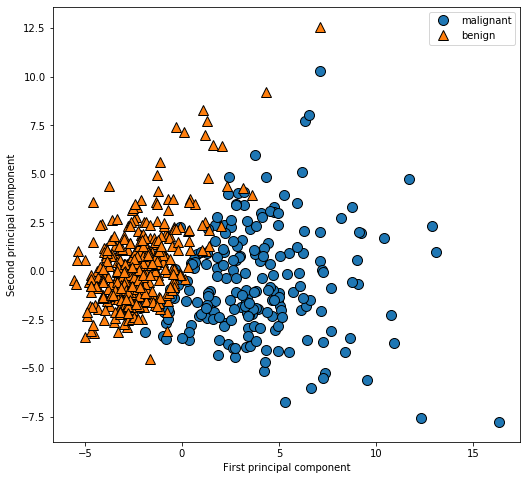

In [16]:
# Plot first vs. second principal component, colored by class
plt.figure(figsize = (14,8))

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer['target'])
plt.legend(cancer['target_names'], loc='best')

plt.gca().set_aspect("equal")
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

plt.show()

PCA can be difficult to interpret as the principal components corresponds to directions in the original data, so they are combinations of the original features.

The principal components are stored in the components_ attribute of the PCA object.

In [17]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Each row in the components_ correspond to one principal component and are sorted by their importance. The columns correspond to each one of the original features.

We can then visualize it with a heatmap so it is easier to understand.

In [18]:
print('PCA components:\n{}'.format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


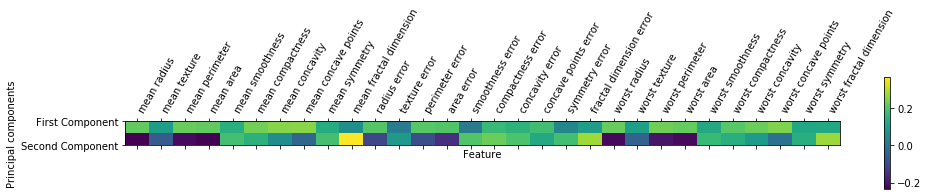

In [19]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['First Component', 'Second Component'])
plt.colorbar()
plt.xticks(range(len(cancer['feature_names'])), cancer['feature_names'], rotation = 60, ha = 'left')
plt.xlabel('Feature')
plt.ylabel('Principal components')
plt.show()

All the features in the first component are positive. This means that there is a general correlation between all the features. As one feature goes up, the others will probably do so.

The second component has mixed signs.

Both components involve all 30 features.

This mixing of features is what makes PCA difficult to explain.

### Eigenfaces for feature extraction

It is possible to find a representation of your data that is better suited to analysis than the raw representation.

A good example of this application is with images. The pixels in images are only meaningful when they are together.

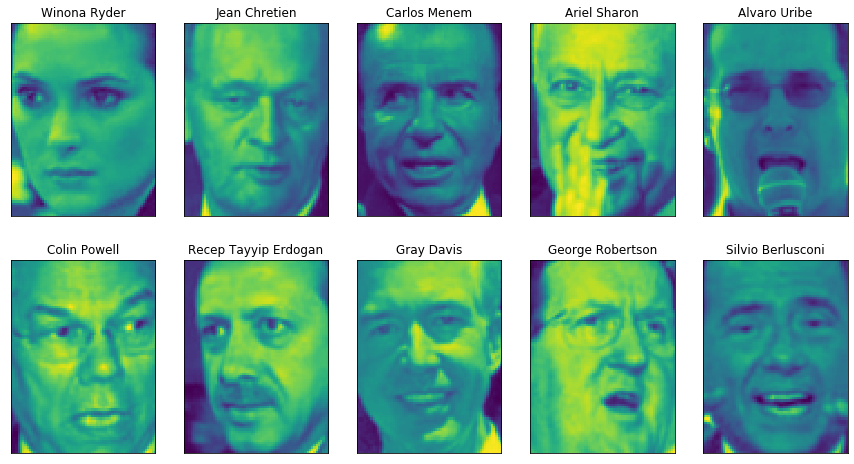

In [20]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5, figsize = (15,8), subplot_kw = {'xticks':(), 'yticks':()})

for target, image, ax in zip(people['target'], people['images'], axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

There are 3,023 images, each 87X65 pizels, belonging to 62 different people

In [21]:
print('people.images.shape: {}'.format(people.images.shape))
print('Number of classes: {}'.format(len(people['target_names'])))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [22]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

The dataset is skewed as there are a lot of George Bushes.

Toe make it less skewed we will admit up to 50 images of the same person. Otherwise the feature extraction would be overwhelmed by the likelihod of George Bush.

In [23]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

A common task is to identify new faces based on the existing database.

However, there are usually many different faces in databases and very few examples of every person.

A simple solution could be to use the KNeihborsClassifier, which could work with only one example in the training set in theory.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


The score is not that bad for a 62-class classification task, but it is not good.

This is where PCA comes in handy. KNN will compare every pixel with another pixel in the same position in another image and take a decision. This means that moving a face one pixel to the right will make a drastic change.

PCA has the whitening option that rescales the principal components to have the same scale. 

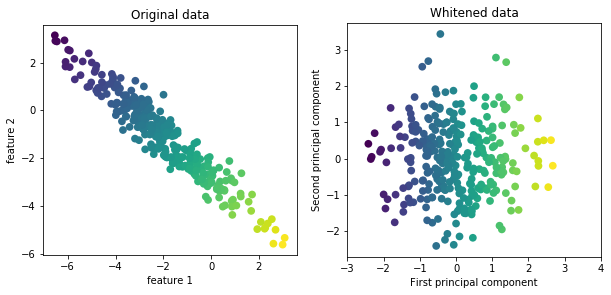

In [25]:
mglearn.plots.plot_pca_whitening()

We now fit the PCA object to the training data and extract the 100 first principal components.

The new data has 100 features, the first 100 principal components.

In [26]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


Now we can use the new representation to classify our images with the KNN.

In [27]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


In [28]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


Accuracy improved quite a lot after using the principal components for analysis.

For image data we can visualize the princippal components, which will be images of the same size as the ones in the dataset.

These components might be hard to interpret. For example, the first one could contrast the difference in lighting from the background and the face.

It is important to remember that computers will interpret images way different than humans.

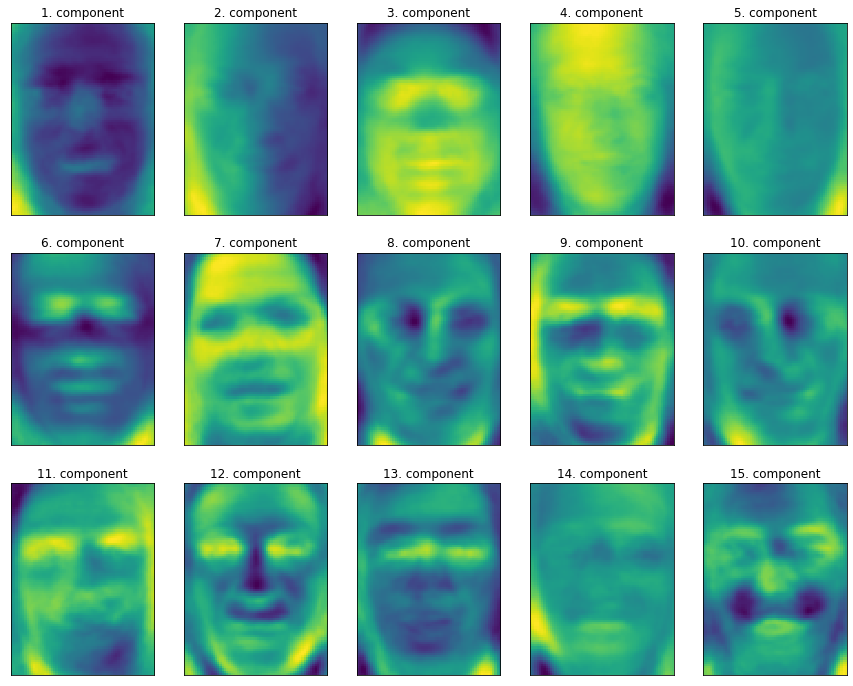

In [29]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

The PCA model is based on pizels, so the position of the face, and lighting will have an effect on how PCA interprets the image.

We can return the components to the original feature space by using the inverse_transform function. In this case, we can reconstruct the faces by using the function and using different numbers of principal components.

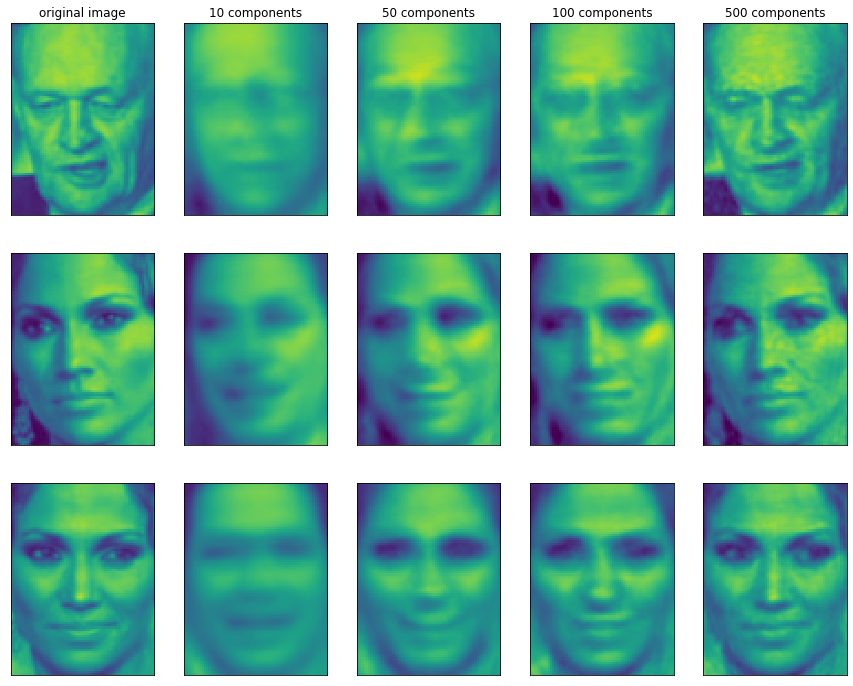

In [30]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

We can also try to use PCA to visualize all the faces in the dataset in a scatterplot, showing the first two principal components with the classes given by who is shown in the images.

In this case it is just a blob, as PCA, even with 10 principal components as shown in the previous pictures, can only capture some of the face features.

Text(0, 0.5, 'Second principal component')

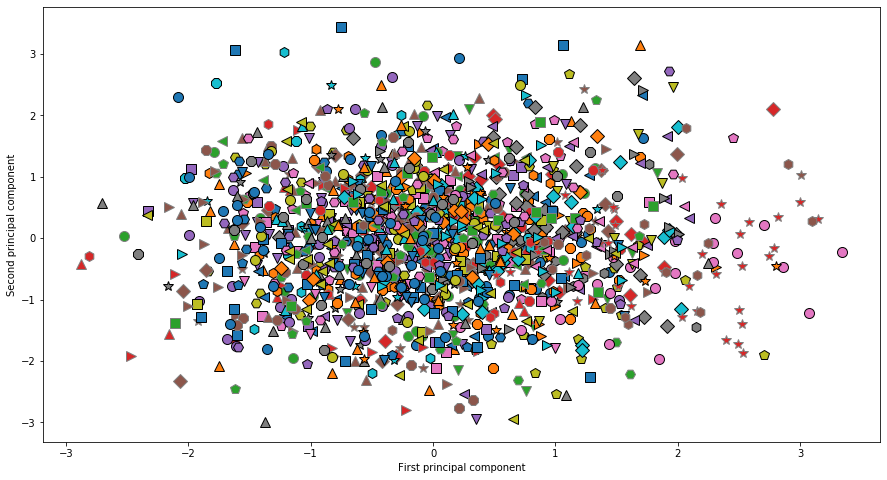

In [31]:
plt.figure(figsize = (15,8))
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## Non-Negative Matrix Factorization (NMF)

As in PCA, the goal is to write each data point as the weighted sum of some components.

In PCA we wanted the components to be orthogonal and that explained as much variance of the data as possible.
In NMF we want the components and the coefficients to be greater or equal to zero. In other words, this method can only be applied to data where each feature is non-negative.


Decomposing data in non-negative weighted sum is helpful for representing data that result from the addition of several independent components. For example, NMF could identify the original COMPONENTS that make up a song (each instrument).

### Applying NMF to synthetic data

First we need to make sure that our data doesn't contain negative points

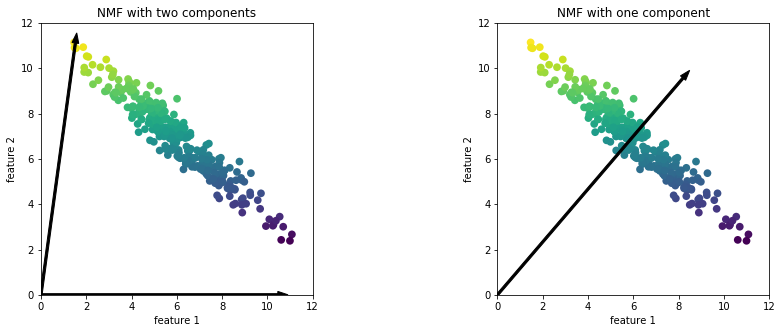

In [32]:
mglearn.plots.plot_nmf_illustration()

In the left it can be seen that all points can be witten as a positive combination of two components. If there are as many components as there are features, the algorithm will point toward the extremes.

If there is only a single component, NMF creates a component that points towards the mean.

### Applying NMF to face images

The main parameter NMF takes is how many components we want to extract, and is usually lower than the number of input features.

First let's see how the number of components affects how the images can be rebuilt.

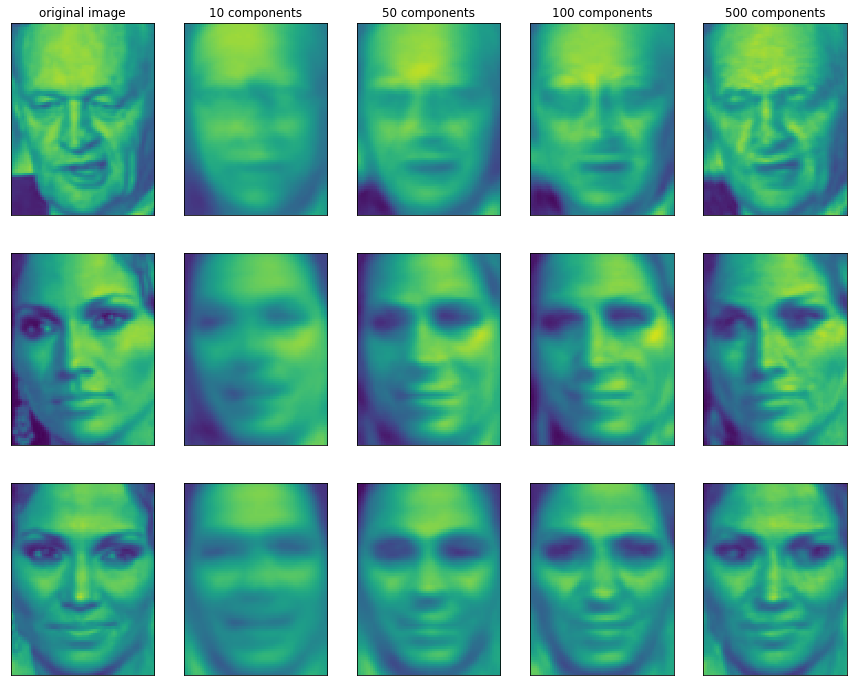

In [33]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

The quality of the images is slightly worse than with PCA, because PCA tries to find the optimum directions for reconstruction, while NMF is not usually used to reconstruct data, but rather to find interesting patterns in the data.

The components shown below are all positive and represent more primitive face prototypes than the ones discovered with PCA.

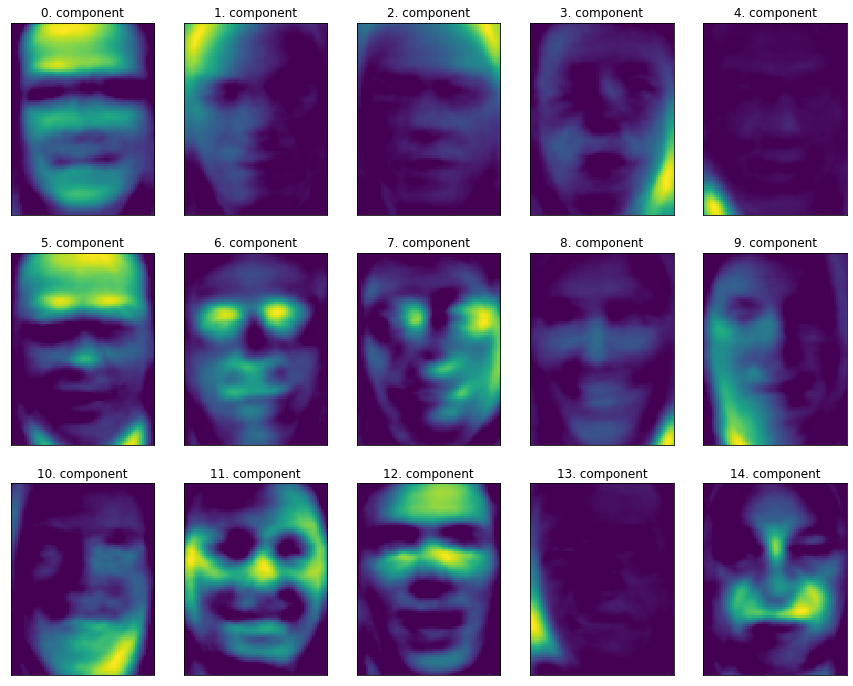

In [34]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 15, random_state = 0).fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig,axes = plt.subplots(3,5, figsize = (15,12), subplot_kw = {'xticks':(), 'yticks':()})

for i, (component,ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

The following images are the ones on the dataset that score high for the third component

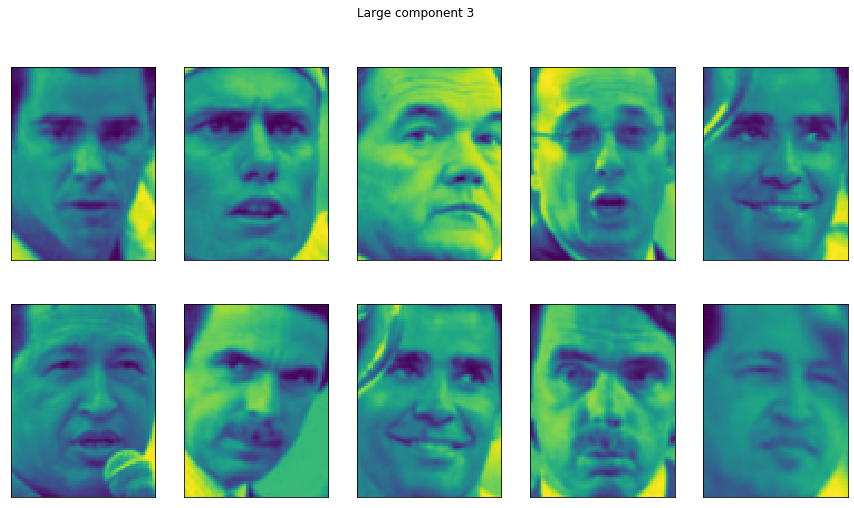

In [35]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))



The following images score high for the seventh component

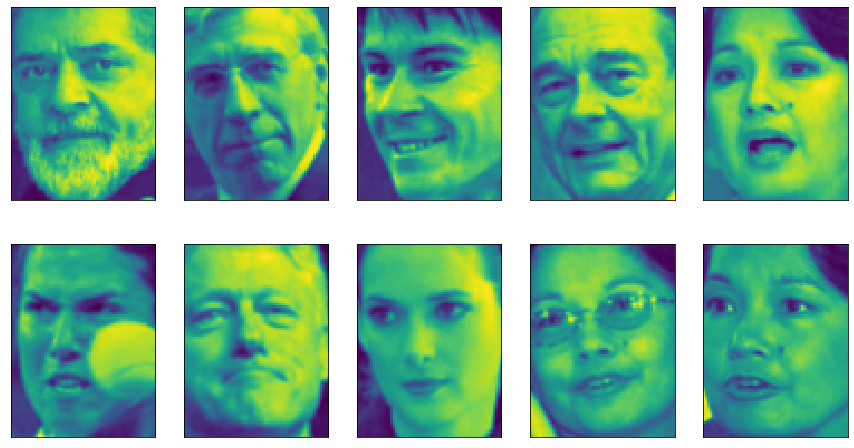

In [36]:
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

As stated before, NMF works best for data with additive structure, like audio, gene expression and text data.

#### Combined signals example
Let's imagine a signal combining three different sources

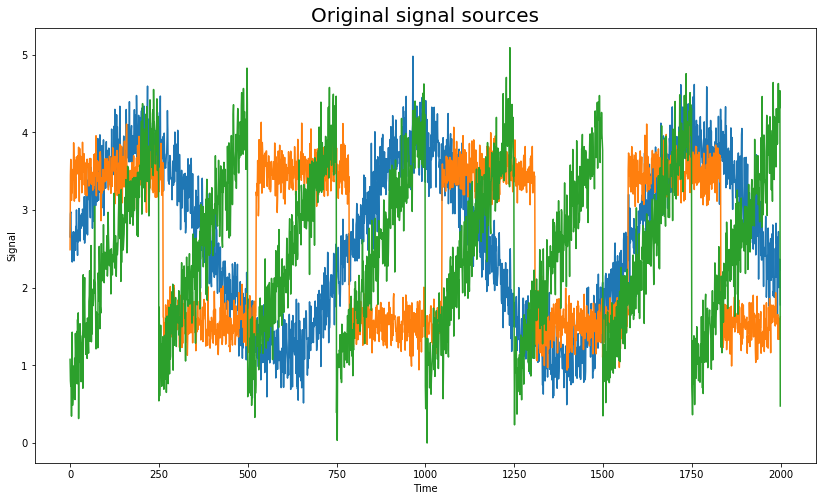

In [37]:
S = mglearn.datasets.make_signals()
plt.figure(figsize = (14,8))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Original signal sources', size = 20)
plt.show()

In [38]:
# Mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print('Shape of measurements: {}'.format(X.shape))

Shape of measurements: (2000, 100)


In [39]:
# We can use NMF to recover the three signals
nmf = NMF(n_components = 3, random_state = 42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [40]:
# For comparison we can also apply PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

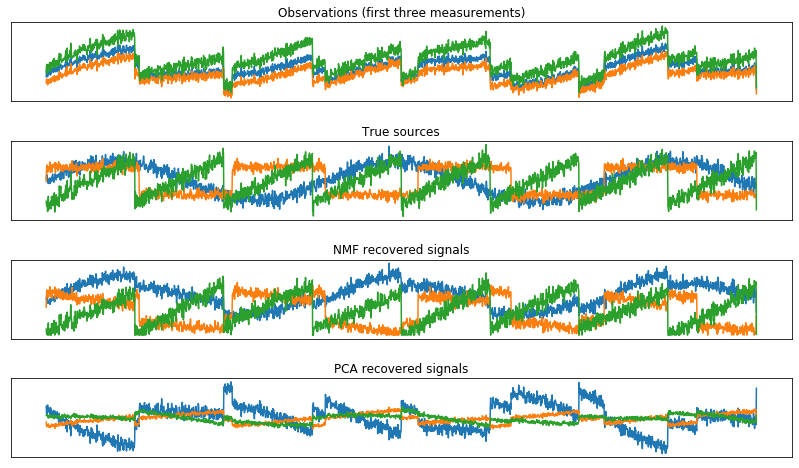

In [41]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(14, 8), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
plt.show()

In the first row we see the first 3 measurements from the 100 mixed measurements created.

In the second we can see the three original sources.

In the third we can see how NMF read the 100 measurements and was able to recreate the actual signals pretty good.

The fourth, PCA, failed to do so.

## t-SNE Manifold Learning

There are other algorithms for visualization called Manifold Learning algorithms that allow more complex mapping than PCA.
t-SNE is one kind of Manifold Learning algorithm.

These kind of algorithms are often used for visualization, so they usually produce only two new features.

This can be used mainly for exploratory analysis, but is rarely used if the next step is supervised learning, as it doesn't permit to be applied on new data, only the data it was trained for.

The idea of t-SNE is to find a two-dimensional representation of the data that preserves the distances between points as best as possible. It tries to keep close points as close as possible.

We will use t-SNE in a dataset of handwritten digits. Each data point is an 8x8 grayscale image of a handwritten digit between 0 and 9.

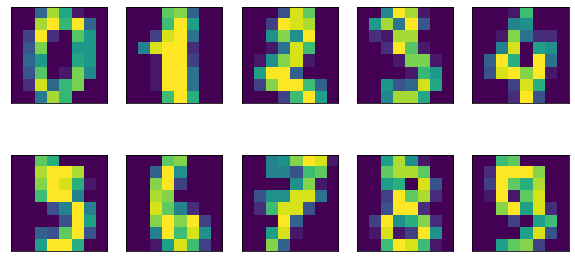

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize = (10,5), subplot_kw = {'xticks':(), 'yticks':()})

for ax, img in zip(axes.ravel(), digits['images']):
    ax.imshow(img)

Now let's use PCA to represent the data in two dimensions

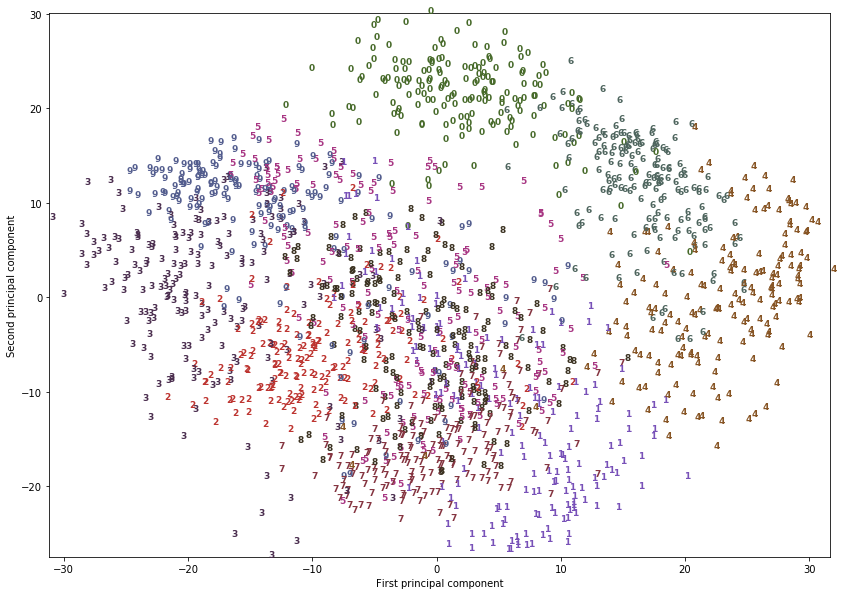

In [43]:
#Build PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(digits['data'])

#Transform the digits data into the first two princippal components
digits_pca = pca.transform(digits['data'])
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(14, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

Digits 0, 6  and 4 are kind of well-separated, but the others overlap quite badly.

Let's try again, but this time using t-SNE

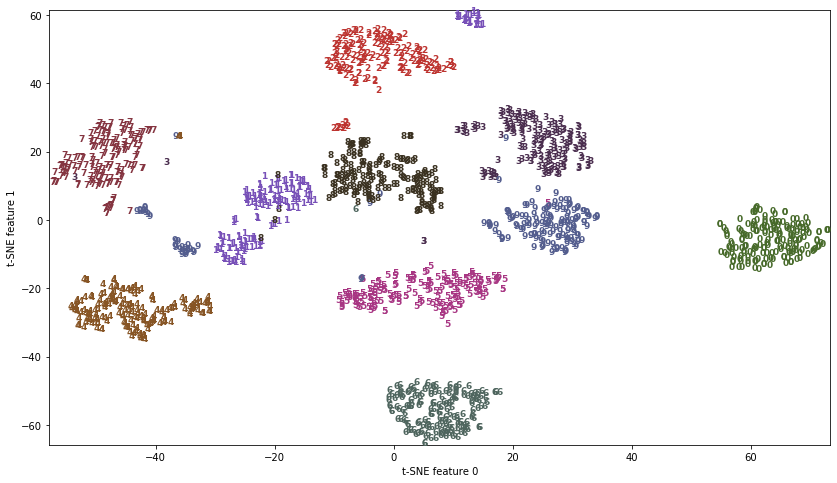

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)
#use fit_transform instead of fit, as tSNE has no transform method
digits_tsne = tsne.fit_transform(digits['data'])

plt.figure(figsize = (14,8))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max() + 1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max() + 1)
for i in range(len(digits['data'])):
    #Actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i,0], digits_tsne[i, 1], str(digits['target'][i]),
            color = colors[digits['target'][i]],
            fontdict = {'weight':'bold', 'size':9})
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')
plt.show()

While this method is completely unsupervised, it can find a representation of the data in two dimensions that can separate the classes clearly based on their position in the original space.

# Clustering

Partitioning the dataset into grups called clusters. The cluster algorithms assign a number to each data point.

It might be similar to classification, but in this case the generated labels have no a priori meaning.

## k-Means Clustering

It tries to find clusters centers that are representative of certain regions of the data.

The algorithms works by alternating betwween assigning each data piint to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it.
The algorithm ends when no more changes are made in the assignments.

With new data, the algorithm will assign a value based on the closest cluster center.

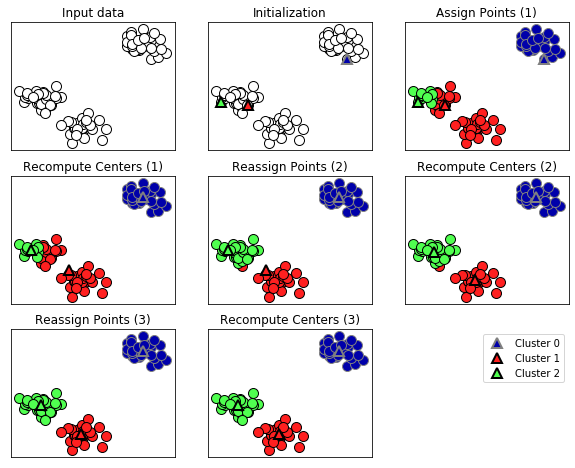

In [45]:
mglearn.plots.plot_kmeans_algorithm()

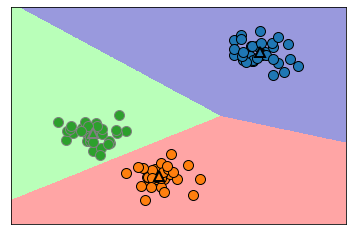

In [46]:
mglearn.plots.plot_kmeans_boundaries()

Now we can apply k-Means to synthetic data.

One needs to pass the n-clusters to the class when we instantiate it. If we don't then it is set to 8 by default, but there is no good reason to actually use this value.

In [47]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#Generate synthetic two-dimensional data
X, y = make_blobs(random_state = 1)

#Build the clustering model
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

While the algorithm is running, each X is assigned a cluster label.

This labels are in the kmeans.labels_ attribute.

As we asked for three clusters, the clusters are names 0, 1 and 2

In [48]:
print('Cluster memberships:\n{}'.format(kmeans.labels_))

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


You can assing new data to a cluster with the predict method.

In [49]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


#### Note:
We don't know the meaning of the labels a priori. We need to inspect the results to actually get some insights from these new labels.

Running the algorithm again could result in a different numbering of the data.

#### Note 2:
The clusters' centers are stored in the cluster_centers_ attribute.

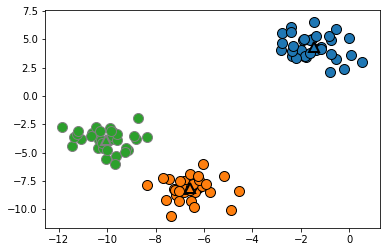

In [50]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

We can also use more or fewer cluster centers.

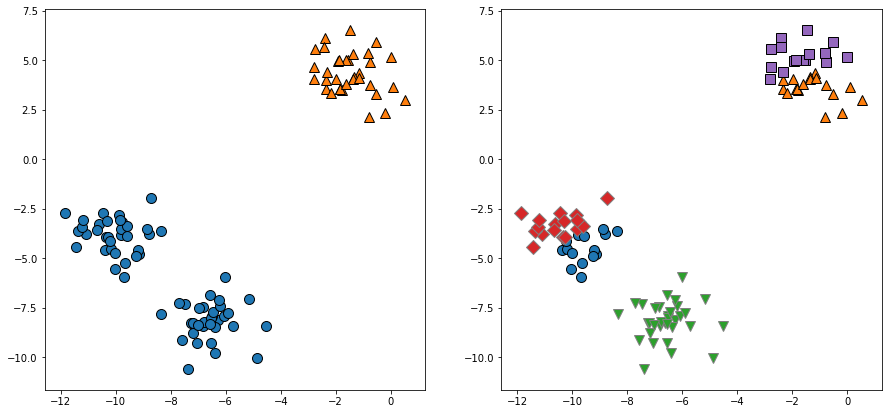

In [51]:
fig, axes = plt.subplots(1,2, figsize = (15,7))

# Using two cluster centers
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# Using five cluster centers
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

plt.show()

### Failure cases of k-Means

Even if we know the 'right' amount of clusters, k-Means might fail because every cluster is only defined by its center, which means that complex shapes will be too much for k-Means to cluster correctly.

In the next example, k-Means assigns some points near the less-dense center as members of the dense clusters

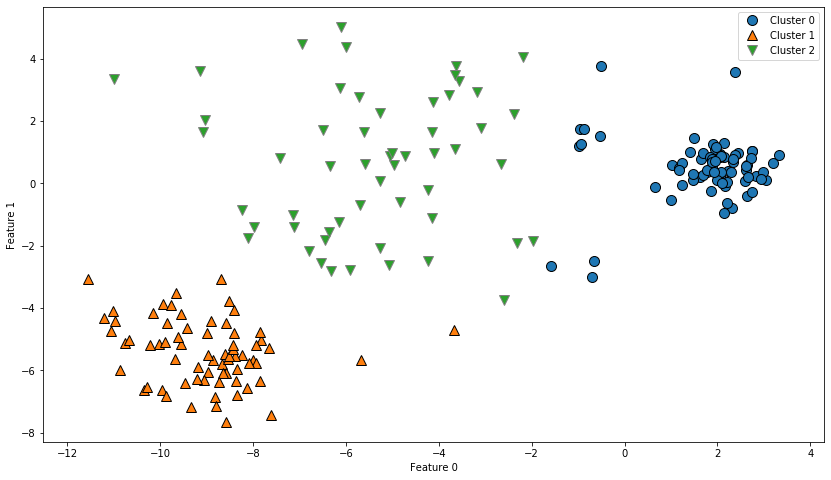

In [52]:
X_varied, y_varied = make_blobs(n_samples = 200, cluster_std = [1,2.5,0.5], random_state = 170)

y_pred = KMeans(n_clusters = 3, random_state = 0).fit_predict(X_varied)

plt.figure(figsize = (14,8))
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

k-Means also assumes that every direction is equally important for each cluster.

In the next example k-Means doesn't care that the groups are stretched towards the diagonal, only the distance to the center is considered.

It fails to identify non-spherical clusters

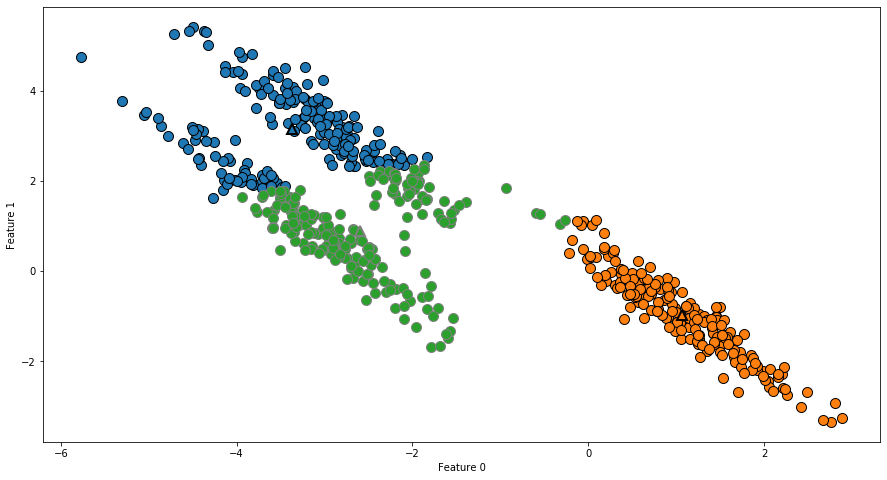

In [53]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.figure(figsize=(15,8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

It fails to identify more complex shapes like the moons dataset

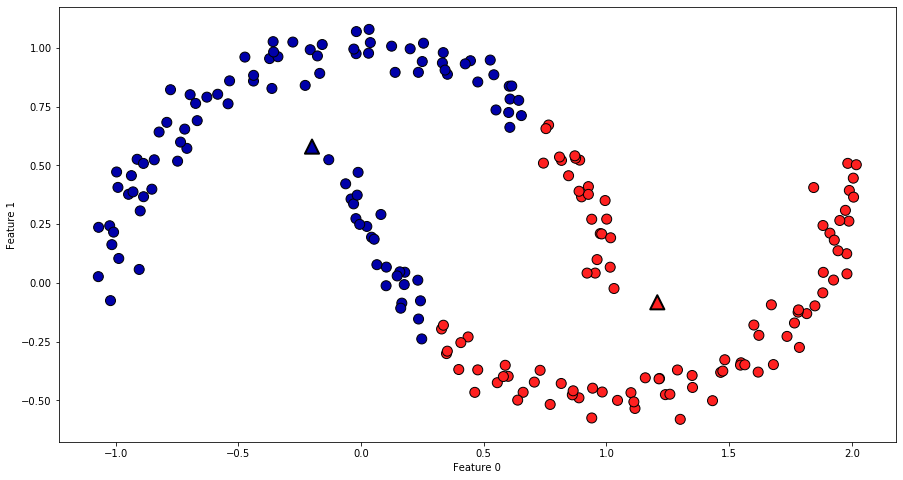

In [54]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.figure(figsize = (15,8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=100, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=200, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### Vector quantization, or seeing k-Means as decomposition

There are some parallels between k-Means and PCA and NMF.

With k-Means you can think of representing a series of data-points with a single component, the cluster center.

This method of representing each point with a single component is called <b>Vector quantization</b>

Let's show the three methods extract components and reconstruct faces. An interesting aspect of usoing vector quantization with k-Means is that we can use more clusters than input features.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

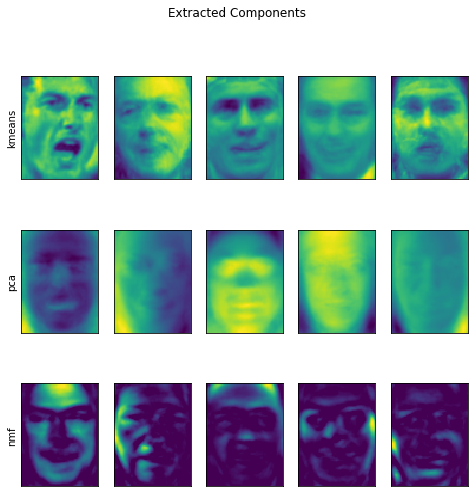

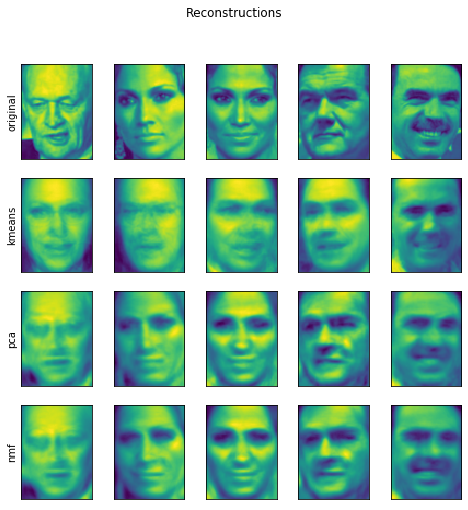

In [56]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Moving to the two_moons dataset, using more clusters with k-Mean we can find a more expressive representation of the data:

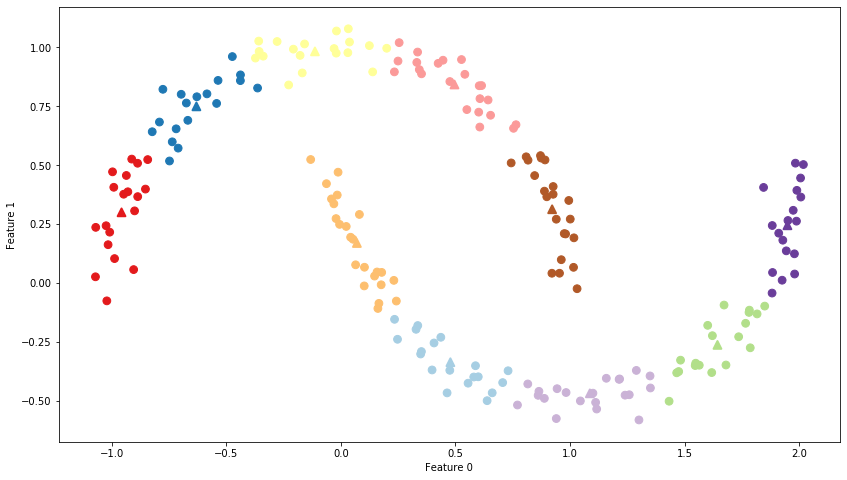

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


In [58]:
X,y  = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

kmeans = KMeans(n_clusters = 10, random_state = 0).fit(X)

y_pred = kmeans.predict(X)

plt.figure(figsize = (14,8))

plt.scatter(X[:,0], X[:,1], c = y_pred, s = 60, cmap = 'Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 60, marker ='^',
            c = range(kmeans.n_clusters), linewidth = 2, cmap = 'Paired')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.show()
print('Cluster memberships:\n{}'.format(y_pred))

By using 10 clusters, each data point is assigned a number between 0 and 9.

We can see this as data being represented by 10 components. Using this 10-dimensional representation it would be possible to use a linear model for classification, impossible with the original features.

It is also possible to get an even more expressive representation by using the distances to each of the cluster centers as features.

In other words, the features of each y (data point) are distances to each of the cluster centers.

In [59]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


## Agglommerative Clustering

A series of algorithms that start by declaring each point its own cluster, and then merges the two most similar clusters until some final criterion is met.

In scikit-learn the stopping criterions is the number of clusters.

The "most similar cluster" is defined in three ways in scikit-learn:

<b>ward</b>
* The default choice. Ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally-sized.

<b>average</b>
* Merges two clusters that have the smallest average distance between their points

<b>complete</b>
* Merges to clusters that have the smallest maximum distance between their points


The following plots show the progresison of agglomerative clustering in a two-dimensional dataset.

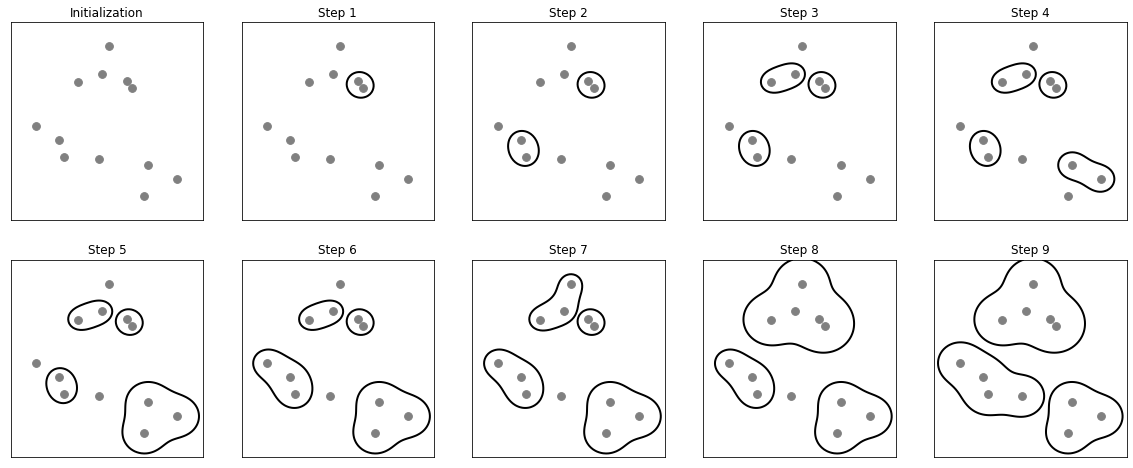

In [60]:
mglearn.plots.plot_agglomerative_algorithm()

Now let's use it on a three-cluster dataset. Because of the way the algorithm works, it cannot perform predictions for new datapoints. To get the cluster memberships on the training points we use fit_predict.

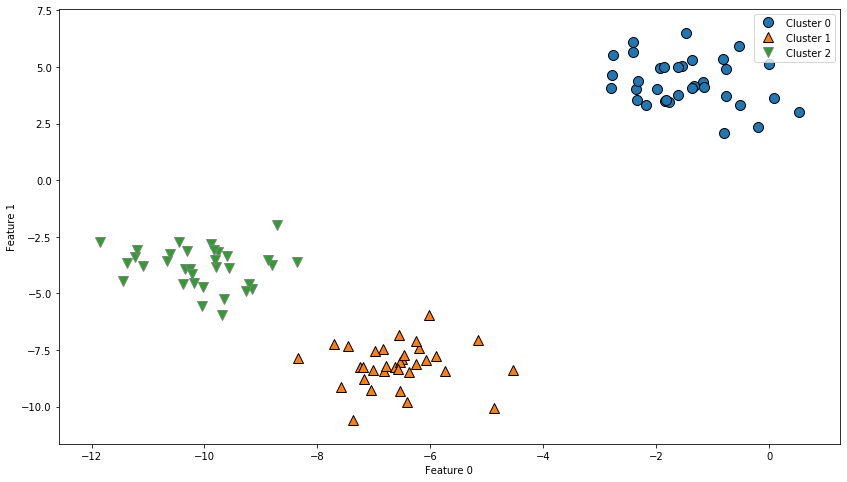

In [64]:
from sklearn.cluster import AgglomerativeClustering
X,y = make_blobs(random_state = 1)

agg = AgglomerativeClustering(n_clusters = 3)
assignment = agg.fit_predict(X)

plt.figure(figsize = (14,8))
mglearn.discrete_scatter(X[:,0], X[:,1], assignment)

plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### Hierarchical clustering and dendrograms

Each final point makes a journey from being its cluster to belonging to one bigger final cluster. Each intermediate step provides a clustering of the data. 

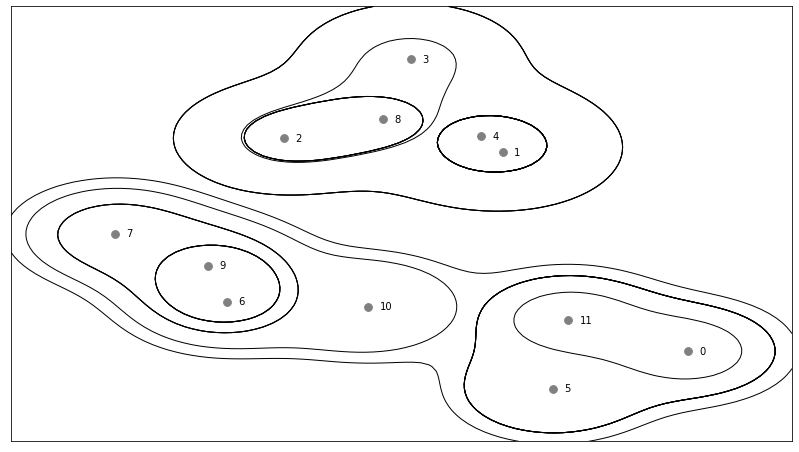

In [63]:
plt.figure(figsize = (14,8))
mglearn.plots.plot_agglomerative()

To get this kind of visualization in higher-dimensional datasets, we can use dendograms with SciPy, as scikit-learn can't create them.

Text(0, 0.5, 'Cluster distance')

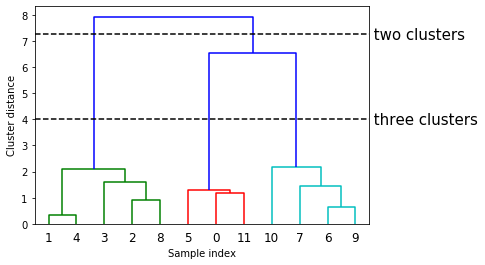

In [65]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

The bottom of the plot shows individual data points. Then, as you go up you can see how the algorithm starts to cluster the points. First is clusters 1 and 4, then 6 and 9 and so on.

The length of the branches show how far appart he clustered points are. The longest up, the farthest. When only two clusters remain at the top, we can see that mergind three to two clusters meant merging some pretty far apart points.

## DBSCAN